import libery

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from collections import Counter
import tensorflow 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


Load data

In [2]:
faces = fetch_lfw_people(min_faces_per_person=100, resize=1.0, slice_=(slice(60, 188), slice(60, 188)), color=True)
class_count = len(faces.target_names)


Print target names and images shape

In [3]:
print(faces.target_names)
print(faces.images.shape)


['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 128, 128, 3)


Plot some example images

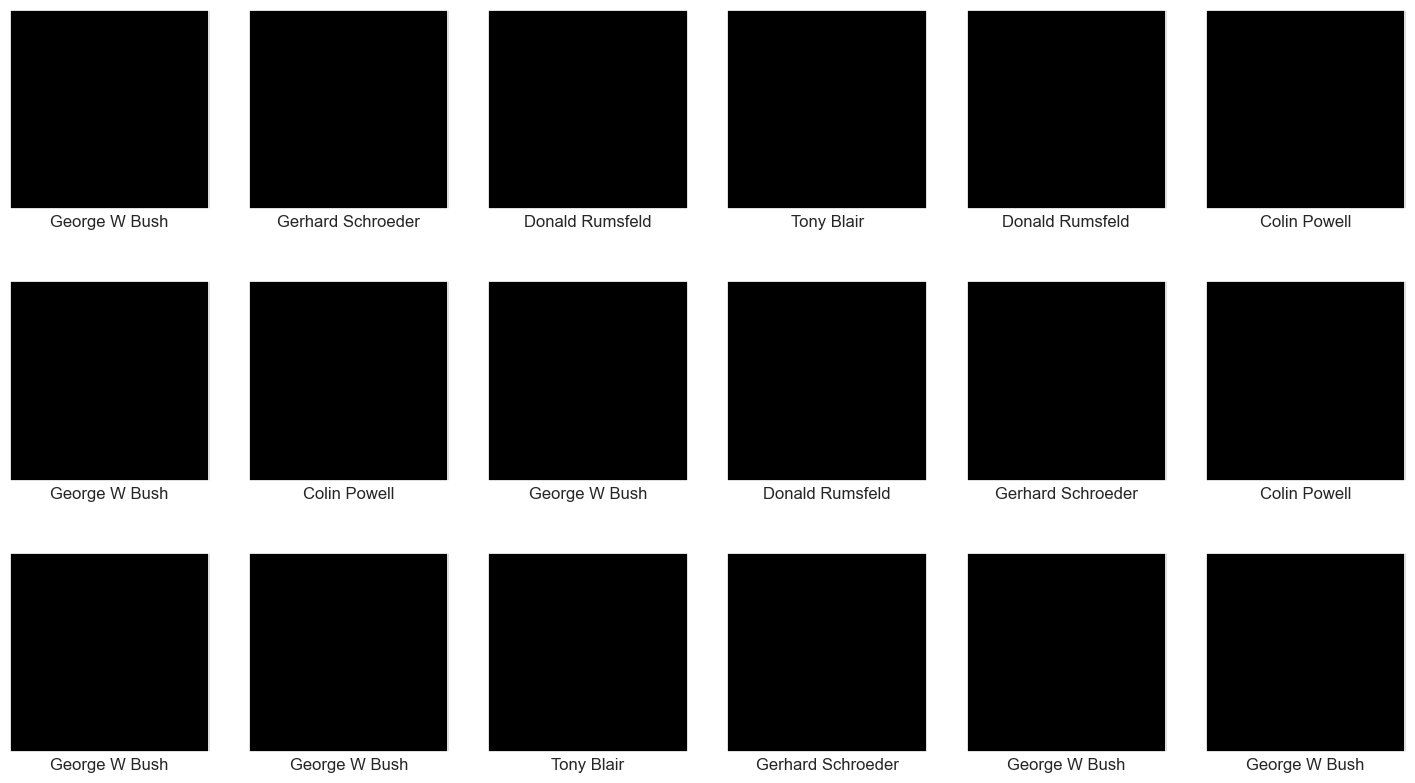

In [4]:
%matplotlib inline
sns.set()
fig, ax = plt.subplots(3, 6, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i] / 255)  # Scale pixel values
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
plt.show()

 Plot the number of images per person

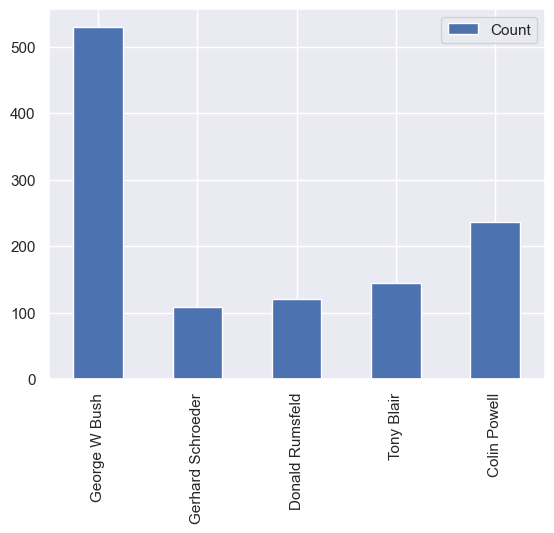

In [5]:
counts = Counter(faces.target)
names = {faces.target_names[key]: counts[key] for key in counts.keys()}
df = pd.DataFrame.from_dict(names, orient='index', columns=['Count'])
df.plot(kind='bar')
plt.show()

Prepare data

In [6]:
mask = np.zeros(faces.target.shape, dtype=bool)
for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = True

x_faces = faces.data[mask]
y_faces = faces.target[mask]
x_faces = np.reshape(x_faces, (x_faces.shape[0], faces.images.shape[1], faces.images.shape[2], faces.images.shape[3]))

face_images = x_faces / 255  # Normalize pixel values
face_labels = to_categorical(y_faces)

Split the dataset

In [7]:
x_train, x_test, y_train, y_test = train_test_split(face_images, face_labels, train_size=0.8, stratify=face_labels, random_state=0)

 Build the model

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(x_faces.shape[1:])),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(class_count, activation='softmax')
])

c:\Users\btc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,725 (6.34 MB)

 Trainable params: 1,662,725 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

train model

In [10]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=25)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 402ms/step - accuracy: 0.1809 - loss: 1.6110 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 333ms/step - accuracy: 0.1984 - loss: 1.6098 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.1959 - loss: 1.6095 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 303ms/step - accuracy: 0.1893 - loss: 1.6094 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.2380 - loss: 1.6094 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step - accuracy: 0.2044 - loss: 1.6096 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.1536 - loss: 1.6096 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - accuracy: 0.2093 - loss: 1.6095 - val_accuracy: 0

Plot training and validation accuracy

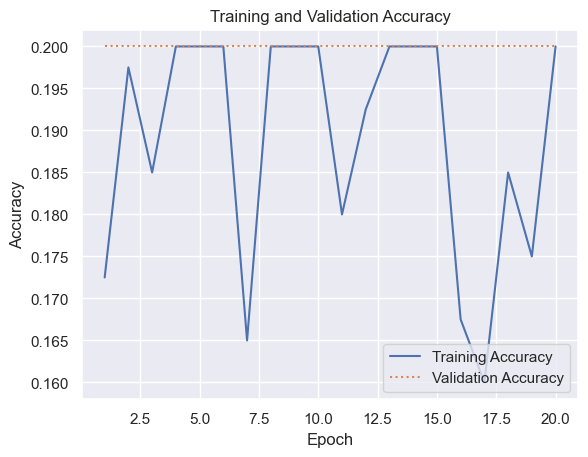

In [11]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


Confusion matrix

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


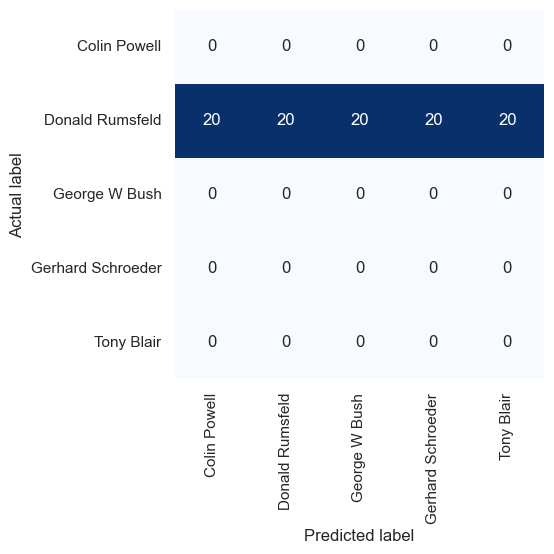

In [12]:
y_predicted = model.predict(x_test)
mat = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()


Predict on new image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Colin Powell: 0.14321479201316833
Donald Rumsfeld: 0.2575037479400635
George W Bush: 0.20190882682800293
Gerhard Schroeder: 0.21287530660629272
Tony Blair: 0.18449729681015015


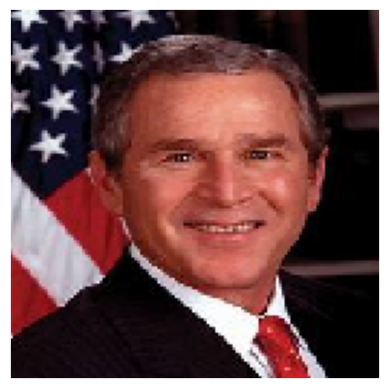

In [16]:
from tensorflow.keras.preprocessing import image as keras_image

x = keras_image.load_img('OIP.jpg', target_size=(x_faces.shape[1:]))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

x = keras_image.img_to_array(x) / 255
x = np.expand_dims(x, axis=0)
y = model.predict(x)[0]

for i in range(len(y)):
    print(f'{faces.target_names[i]}: {y[i]}')